## Python_Capstone_Project_2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
df = pd.read_csv(r'C:\Users\admin\Downloads\Python Assignment 5_BI\Ecommerce - UK Retailer.csv')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df.shape

(541909, 8)

In [5]:
cols = list(df.columns)
print(cols)

['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']


In [6]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [7]:
df['CustomerID']= df['CustomerID'].astype('object')

In [8]:
df['InvoiceDate']= df['InvoiceDate'].astype('datetime64[ns]')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB


In [10]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

### 2. Check for missing values in all columns and replace them with the appropriate metric 
(Mean/Median/Mode) 


In [11]:
df['Description'].mode()[0]

'WHITE HANGING HEART T-LIGHT HOLDER'

In [12]:
df['Description'].fillna(df['Description'].mode()[0], inplace = True)

In [13]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [14]:
df["CustomerID"].fillna(df['CustomerID'].mode()[0], inplace = True)
df['CustomerID'].mode()[0]

17841.0

In [15]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [16]:
df['CustomerID']= df['CustomerID'].astype('object')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  541909 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   541909 non-null  object        
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB


### 3. Remove duplicate rows 


In [18]:
df.duplicated().sum()

5268

In [19]:
df.drop_duplicates(inplace = True)

In [20]:
df.duplicated().sum()

0

### 4. Remove rows which have negative values in Quantity column 


In [21]:
df.loc[df['Quantity'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [22]:
df = df[df["Quantity"]>=0]
df = df[df["UnitPrice"]>=0]
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 526052 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    526052 non-null  object        
 1   StockCode    526052 non-null  object        
 2   Description  526052 non-null  object        
 3   Quantity     526052 non-null  int64         
 4   InvoiceDate  526052 non-null  datetime64[ns]
 5   UnitPrice    526052 non-null  float64       
 6   CustomerID   526052 non-null  object        
 7   Country      526052 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 36.1+ MB


In [23]:
df.loc[df['Quantity'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


### 1. Perform Basic EDA 


a. Boxplot – All Numeric Variables 


<function matplotlib.pyplot.show(close=None, block=None)>

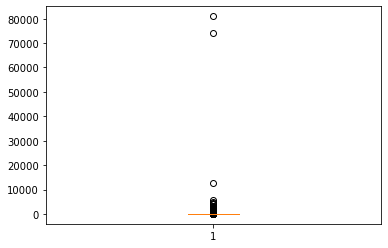

In [24]:
plt.boxplot(df["Quantity"])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

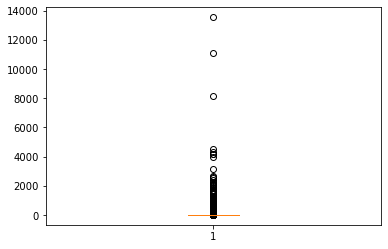

In [25]:
plt.boxplot(df["UnitPrice"])
plt.show

<AxesSubplot:>

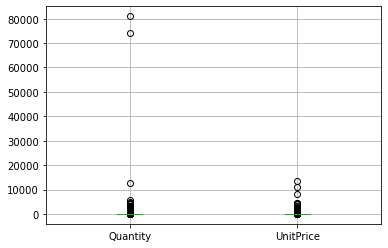

In [26]:
df.boxplot()

b. Histogram – All Numeric Variables

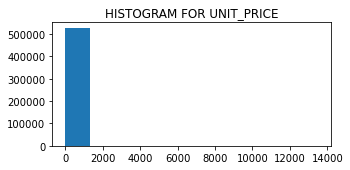

In [27]:
plt.figure(figsize=(5,5))
plt.subplot(2,1,1)
plt.hist(df["UnitPrice"])
plt.title("HISTOGRAM FOR UNIT_PRICE")
plt.show()



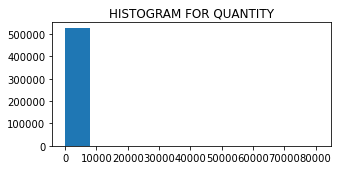

In [28]:
plt.figure(figsize=(5,5))
plt.subplot(2,1,2)
plt.hist(df["Quantity"])
plt.title("HISTOGRAM FOR QUANTITY")
plt.show()

c. Distribution Plot – All Numeric Variables 


C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


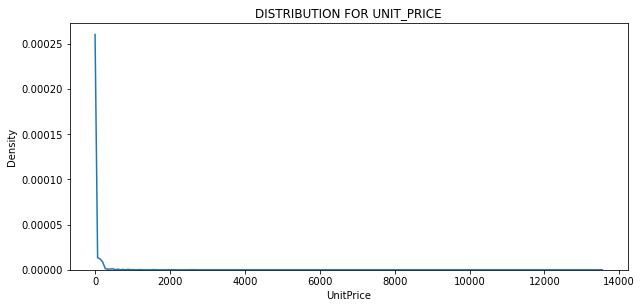

In [34]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
sns.distplot(df["UnitPrice"], hist= False)
plt.title("DISTRIBUTION FOR UNIT_PRICE")
plt.show()



C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


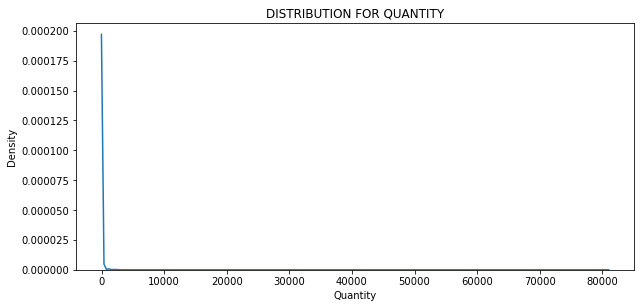

In [35]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,2)
sns.distplot(df["Quantity"], hist=False)
plt.title("DISTRIBUTION FOR QUANTITY")
plt.show()

d. Aggregation for all numerical Columns

In [36]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,526052.0,10.730911,157.592136,1.0,1.00,4.00,11.00,80995.00
UnitPrice,526052.0,3.913818,36.053205,0.0,1.25,2.08,4.13,13541.33


e. Unique Values across all columns 


In [37]:
for col in list(df):
    print(col)
    print(df[col].unique())

InvoiceNo
['536365' '536366' '536367' ... '581585' '581586' '581587']
StockCode
['85123A' '71053' '84406B' ... '90214U' '47591b' '23843']
Description
['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'LETTER "U" BLING KEY RING'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']
Quantity
[    6     8     2    32     3     4    24    12    48    18    20    36
    80    64    10   120    96    23     5     1    50    40   100   192
   432   144   288    16     9   128    25    30    28     7    56    72
   200   600   480    14    11    33    13    70   252    60   216   384
    27    15    22    19    17    21    34    47   108    52    75   270
    42   240    90   320  1824   204    69   160  2880  1400    39    26
  1440    31    82    78    97    98    35    57   110   720   156   324
    38    37    49    95    29    41   402   378   150   300    54   104
    67   258    66    44    55    46    99    61   408   972  

f. Duplicate values across all columns 


In [38]:
duplicateRowsDF = df[df.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF)

Duplicate Rows except first occurrence based on all columns are :
Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []


g. Correlation – Heatmap - All Numeric Variables

In [39]:
df.corr()

,Quantity,UnitPrice
Quantity,1.000000,-0.003831
UnitPrice,-0.003831,1.000000


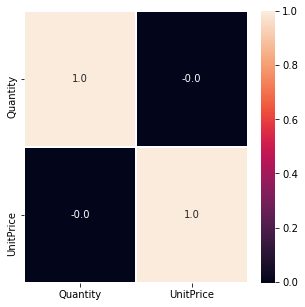

In [40]:
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt='.1f',ax=ax)
plt.show()

h. Regression Plot - All Numeric Variables 

Text(0.5, 1.0, 'UNITPRICE VS QUANTITY RELATION')

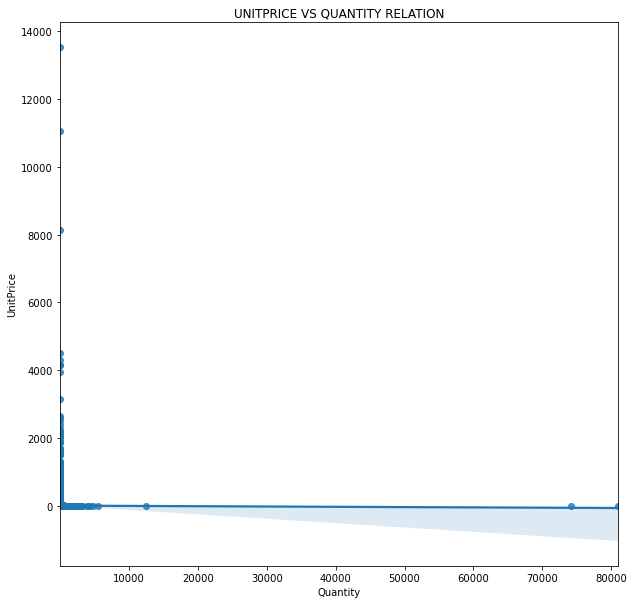

In [34]:
plt.figure(figsize=(10,10))
sns.regplot(data = df, x= "Quantity", y ="UnitPrice")
plt.title("UNITPRICE VS QUANTITY RELATION")

i. Bar Plot – Every Categorical Variable vs every Numerical Variable 


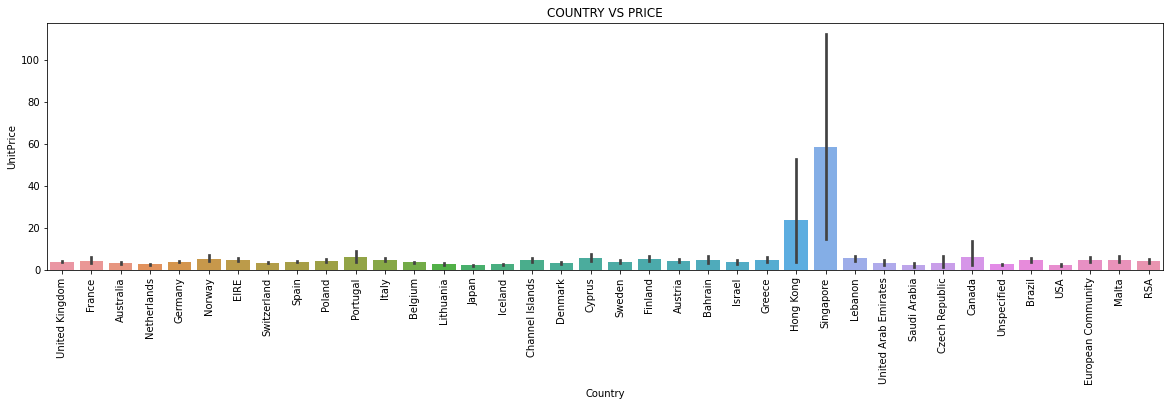

In [35]:
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
sns.barplot(data = df, x="Country", y="UnitPrice")
plt.xticks(rotation=90)
plt.title("COUNTRY VS PRICE")
plt.show()


Text(0.5, 1.0, 'COUNTRY VS QUANTITY')

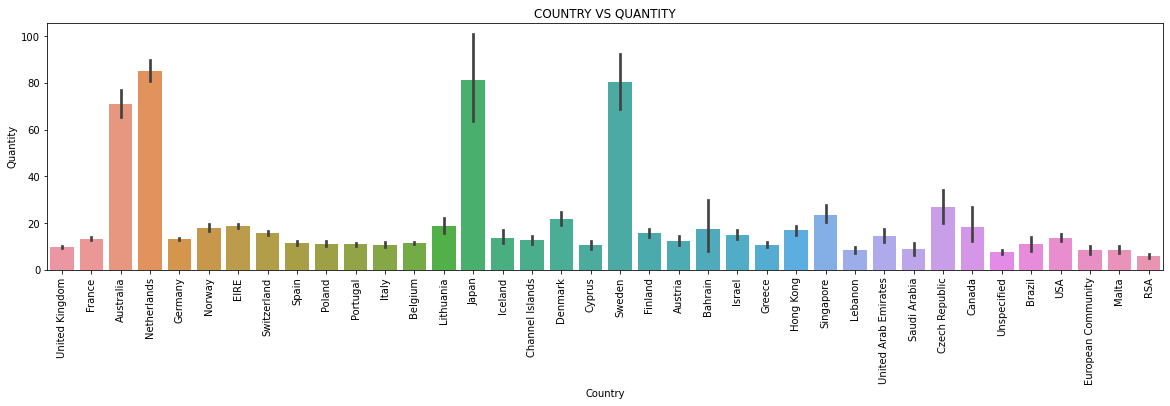

In [36]:
plt.figure(figsize=(20,10))
plt.subplot(2,1,2)
sns.barplot(data = df, x="Country", y="Quantity")
plt.xticks(rotation=90)
plt.title("COUNTRY VS QUANTITY")


j. Pair plot - All Numeric Variables 


Text(0.5, 1.0, 'PAIR PLOT FOR NUMERIC COLUMN')

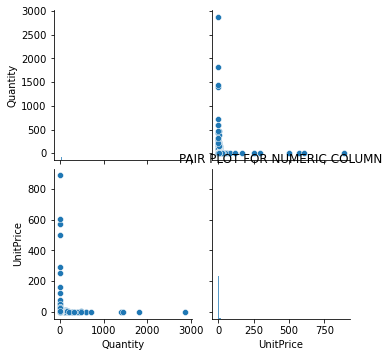

In [27]:
sns.pairplot(df.head(10000), x_vars=["Quantity","UnitPrice"],y_vars=["Quantity","UnitPrice"] )
plt.title("PAIR PLOT FOR NUMERIC COLUMN", )


k. Line chart to show the trend of data - All Numeric/Date Variables 

In [ ]:
#At last all graphs are available

l. Plot the skewness - All Numeric Variables 

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Quantity', ylabel='Density'>

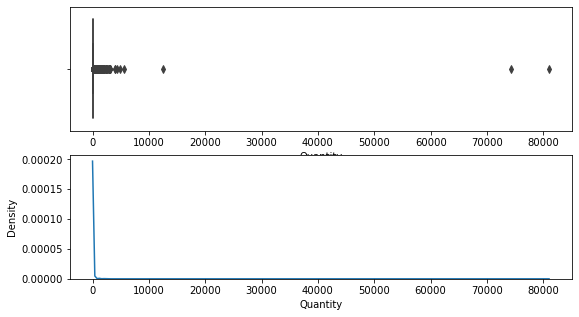

In [37]:
plt.figure(figsize = (9, 5))

plt.subplot(211)
sns.boxplot(df['Quantity'])

plt.subplot(212)
sns.kdeplot(df['Quantity'])

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='UnitPrice', ylabel='Density'>

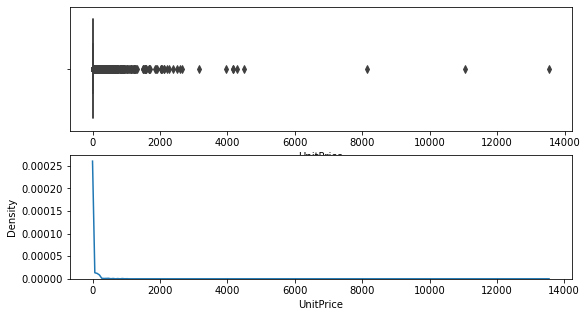

In [38]:
plt.figure(figsize = (9, 5))

plt.subplot(211)
sns.boxplot(df['UnitPrice'])

plt.subplot(212)
sns.kdeplot(df['UnitPrice'])

### 5. Add the columns - Month, Day and Hour for the invoice 


In [104]:
df['Month'] = pd.DatetimeIndex(df['InvoiceDate']).month
df['Day'] = pd.DatetimeIndex(df['InvoiceDate']).day
df['Hour'] = pd.DatetimeIndex(df['InvoiceDate']).hour

In [105]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Day,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,1,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,1,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,1,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,1,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,1,8


### 6. How many orders made by the customers? 


In [106]:
print("Total orders made in the year: ",df["InvoiceNo"].nunique())

Total orders made in the year:  20726


### 7. TOP 5 customers with higher number of orders 


In [107]:
order_per_head = df.groupby("CustomerID")["InvoiceNo"].nunique().reset_index()
order_per_head.sort_values("InvoiceNo", ascending = False, ignore_index = True).head()

,CustomerID,InvoiceNo
0,17841.0,2314
1,12748.0,210
2,14911.0,201
3,13089.0,97
4,14606.0,93


### 8. How much money spent by the customers? 

In [108]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Day,Hour,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,1,8,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,1,8,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,1,8,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,1,8,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,1,8,20.34


In [109]:
print("Total money spend : ", df["TotalPrice"].sum())

Total money spend :  10642110.804000003


### 9. TOP 5 customers with highest money spent 

In [110]:
money_per_head = df.groupby("CustomerID")["TotalPrice"].sum().reset_index()
money_per_head.sort_values("TotalPrice", ascending = False, ignore_index = True).head()


,CustomerID,TotalPrice
0,17841.0,1.795422e+06
1,14646.0,2.802060e+05
2,18102.0,2.596573e+05
3,17450.0,1.943908e+05
4,16446.0,1.684725e+05


### 10. How many orders per month?

In [112]:
order_per_month = df.groupby("Month")["InvoiceNo"].nunique().reset_index()
order_per_month

,Month,InvoiceNo
0,1,1120
1,2,1126
2,3,1531
3,4,1318
4,5,1731
5,6,1576
6,7,1540
7,8,1407
8,9,1896
9,10,2129


### 11. How many orders per day? 


In [113]:
order_per_day = df.groupby("Day")["InvoiceNo"].nunique().reset_index()
order_per_day

,Day,InvoiceNo
0,1,780
1,2,686
2,3,577
3,4,708
4,5,795
5,6,882
6,7,851
7,8,887
8,9,732
9,10,723


### 12. How many orders per hour? 

In [120]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Day,Hour,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,1,8,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,1,8,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,1,8,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,1,8,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,1,8,20.34


In [121]:
order_per_hour = df.groupby("Hour")["InvoiceNo"].nunique().reset_index()
order_per_hour

,Hour,InvoiceNo
0,6,1
1,7,29
2,8,568
3,9,1538
4,10,2431
5,11,2473
6,12,3323
7,13,2818
8,14,2555
9,15,2474


### 13. How many orders for each country? 

In [122]:
order_per_country = df.groupby("Country")["InvoiceNo"].nunique().reset_index()
order_per_country

,Country,InvoiceNo
0,Australia,57
1,Austria,17
2,Bahrain,3
3,Belgium,98
4,Brazil,1
5,Canada,6
6,Channel Islands,26
7,Cyprus,16
8,Czech Republic,2
9,Denmark,18


### 14. Orders trend across months 

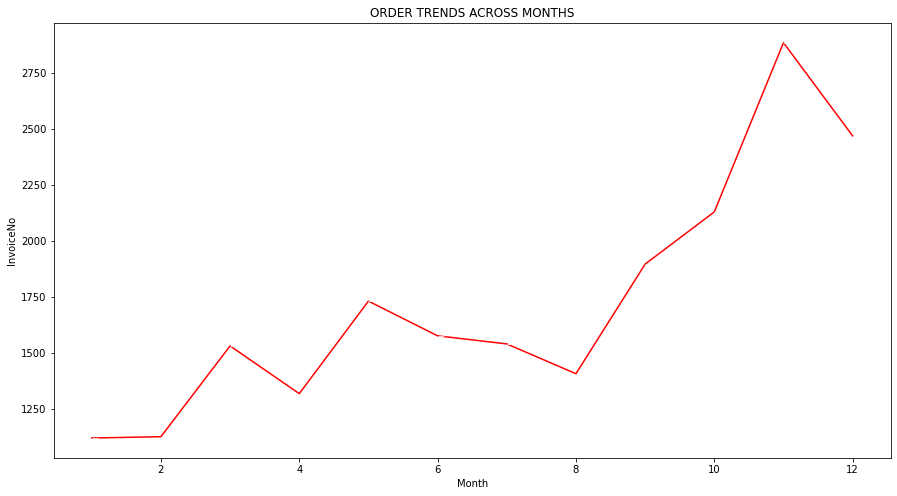

In [126]:
plt.figure(figsize=(15,8))
sns.lineplot(data=order_per_month, x="Month", y="InvoiceNo", marker = True, color = "red")
plt.title("ORDER TRENDS ACROSS MONTHS");

### 15. How much money spent by each country?

In [124]:
order_per_country= df.groupby("Country")["TotalPrice"].sum().reset_index()
order_per_country["TotalPrice"]=order_per_country["TotalPrice"].round()
order_per_country.sort_values("TotalPrice", ascending = False, ignore_index = True)


,Country,TotalPrice
0,United Kingdom,9001744.0
1,Netherlands,285446.0
2,EIRE,283141.0
3,Germany,228678.0
4,France,209625.0
5,Australia,138454.0
6,Spain,61559.0
7,Switzerland,57068.0
8,Belgium,41196.0
9,Sweden,38368.0


#### Question - 1 - ans - K

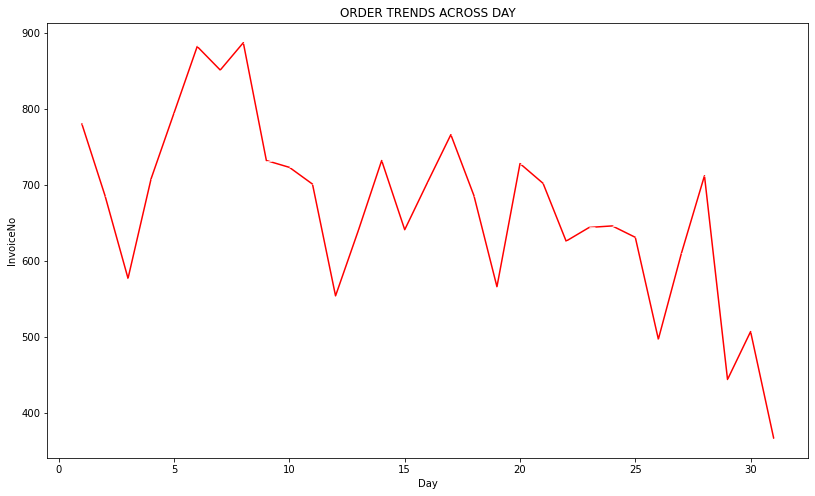

In [131]:
plt.figure(figsize=(30,8))
plt.subplot(1,2,2)
sns.lineplot(data=order_per_day, x="Day", y="InvoiceNo", marker = True, color = "red")
plt.title("ORDER TRENDS ACROSS DAY");

Text(0.5, 1.0, 'ORDER TRENDS ACROSS HOURS')

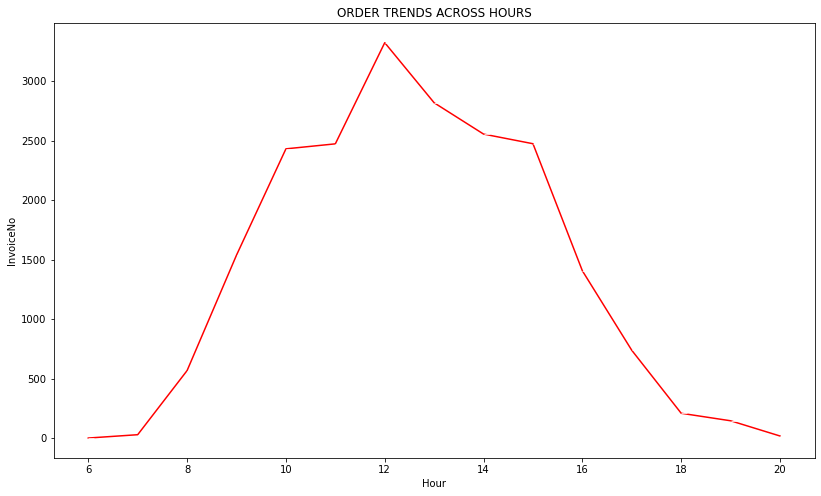

In [132]:
plt.figure(figsize=(30,8))
plt.subplot(1,2,1)
sns.lineplot(data=order_per_hour, x="Hour", y="InvoiceNo", marker = True, color = "red")
plt.title("ORDER TRENDS ACROSS HOURS")



Text(0.5, 1.0, 'ORDER TRENDS ACROSS MONTH')

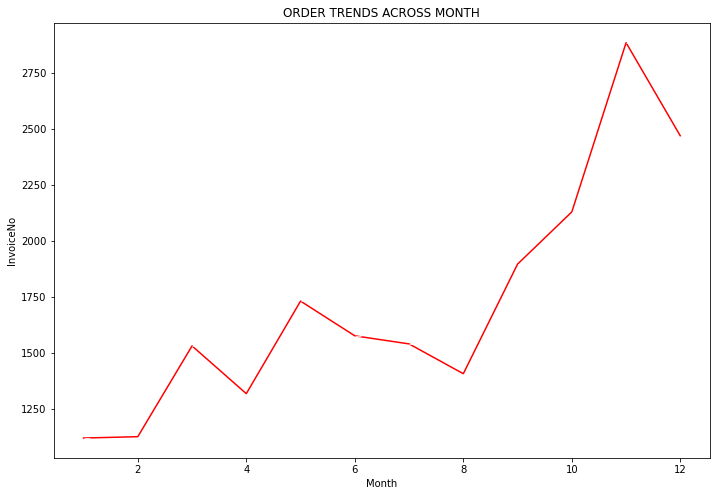

In [133]:
plt.figure(figsize=(40,8))
plt.subplot(1,3,1)
sns.lineplot(data=order_per_month, x="Month", y="InvoiceNo", marker = True, color = "red")
plt.title("ORDER TRENDS ACROSS MONTH")

In [135]:
sales_per_hour = df.groupby("Hour")["TotalPrice"].sum().reset_index()
sales_per_day = df.groupby("Day")["TotalPrice"].sum().reset_index()
sales_per_month = df.groupby("Month")["TotalPrice"].sum().reset_index()


Text(0.5, 1.0, 'SALES TRENDS ACROSS MONTH')

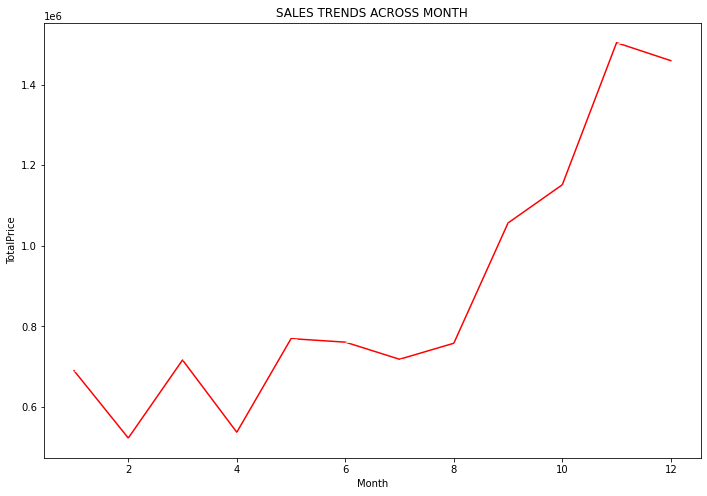

In [137]:
plt.figure(figsize=(40,8))
plt.subplot(1,3,1)
sns.lineplot(data=sales_per_month, x="Month", y="TotalPrice", marker = True, color = "red")
plt.title("SALES TRENDS ACROSS MONTH")

Text(0.5, 1.0, 'SALES TRENDS ACROSS DAY')

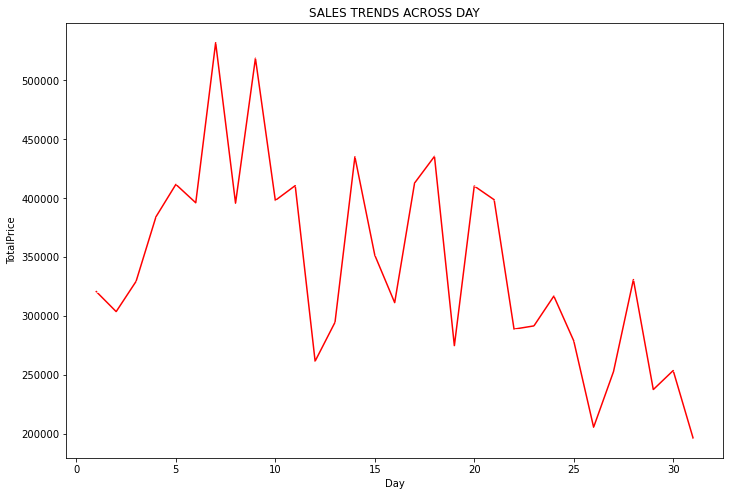

In [138]:
plt.figure(figsize=(40,8))
plt.subplot(1,3,2)
sns.lineplot(data=sales_per_day, x="Day", y="TotalPrice", marker = True, color = "red")
plt.title("SALES TRENDS ACROSS DAY")


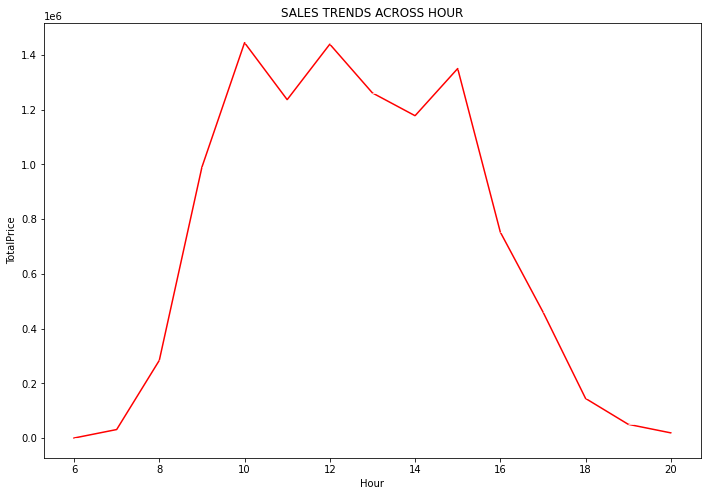

In [139]:
plt.figure(figsize=(40,8))
plt.subplot(1,3,3)
sns.lineplot(data=sales_per_hour, x="Hour", y="TotalPrice", marker = True, color = "red")
plt.title("SALES TRENDS ACROSS HOUR");


In [140]:
quan_per_hour = df.groupby("Hour")["Quantity"].sum().reset_index()
quan_per_day = df.groupby("Day")["Quantity"].sum().reset_index()
quan_per_month = df.groupby("Month")["Quantity"].sum().reset_index()


Text(0.5, 1.0, 'QUANTITY TRENDS ACROSS MONTH')

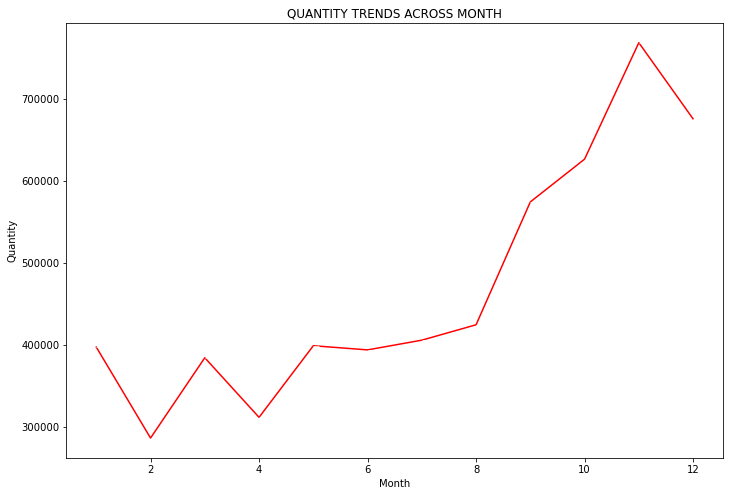

In [141]:
plt.figure(figsize=(40,8))
plt.subplot(1,3,1)
sns.lineplot(data=quan_per_month, x="Month", y="Quantity", marker = True, color = "red")
plt.title("QUANTITY TRENDS ACROSS MONTH")


Text(0.5, 1.0, 'QUANTITY TRENDS ACROSS DAY')

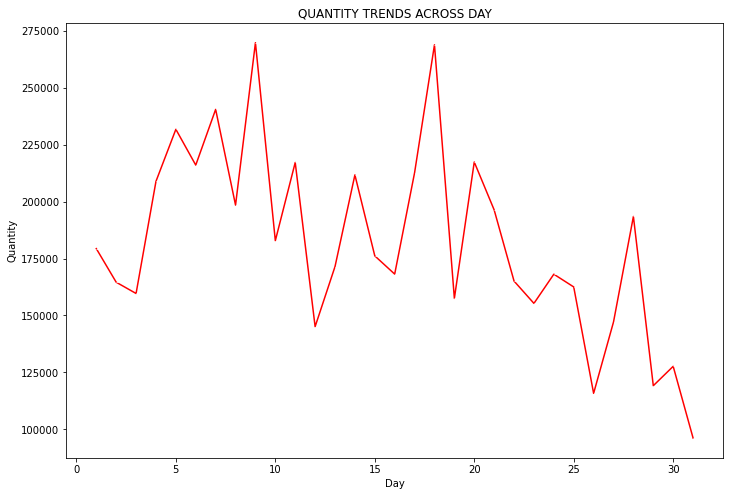

In [142]:
plt.figure(figsize=(40,8))
plt.subplot(1,3,2)
sns.lineplot(data=quan_per_day, x="Day", y="Quantity", marker = True, color = "red")
plt.title("QUANTITY TRENDS ACROSS DAY")


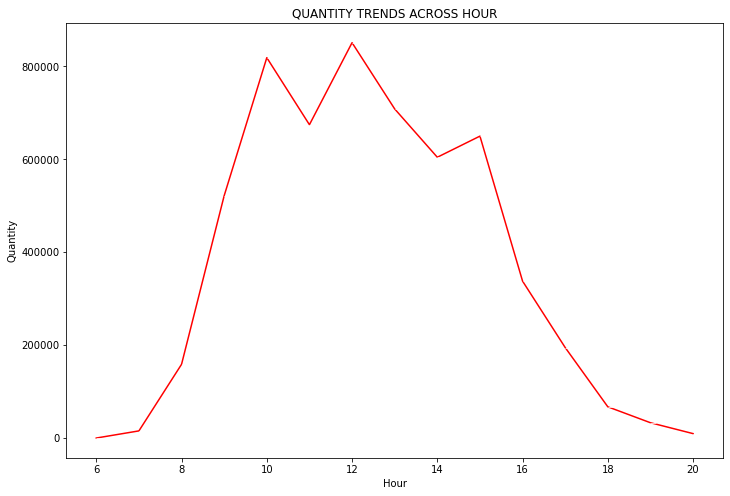

In [143]:
plt.figure(figsize=(40,8))
plt.subplot(1,3,3)
sns.lineplot(data=quan_per_hour, x="Hour", y="Quantity", marker = True, color = "red")
plt.title("QUANTITY TRENDS ACROSS HOUR");


In [144]:
quan_per_hour = df.groupby("Hour")["UnitPrice"].sum().reset_index()
quan_per_day = df.groupby("Day")["UnitPrice"].sum().reset_index()
quan_per_month = df.groupby("Month")["UnitPrice"].sum().reset_index()


Text(0.5, 1.0, 'UNITPRICE TRENDS ACROSS MONTH')

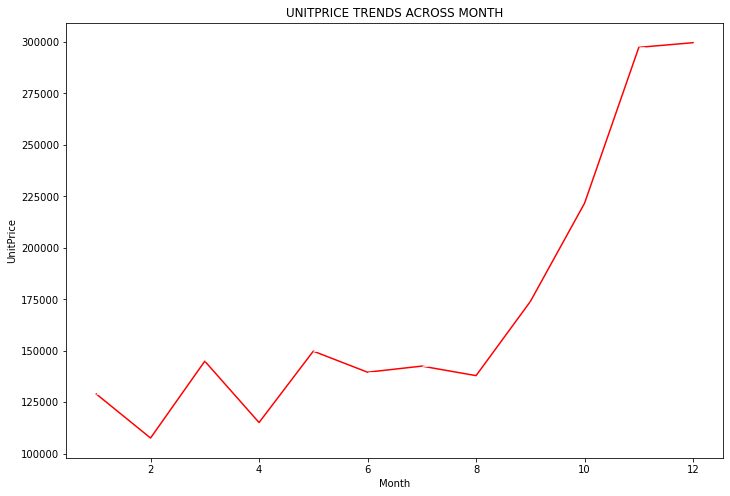

In [145]:
plt.figure(figsize=(40,8))
plt.subplot(1,3,1)
sns.lineplot(data=quan_per_month, x="Month", y="UnitPrice", marker = True, color = "red")
plt.title("UNITPRICE TRENDS ACROSS MONTH")


Text(0.5, 1.0, 'UNITPRICE TRENDS ACROSS DAY')

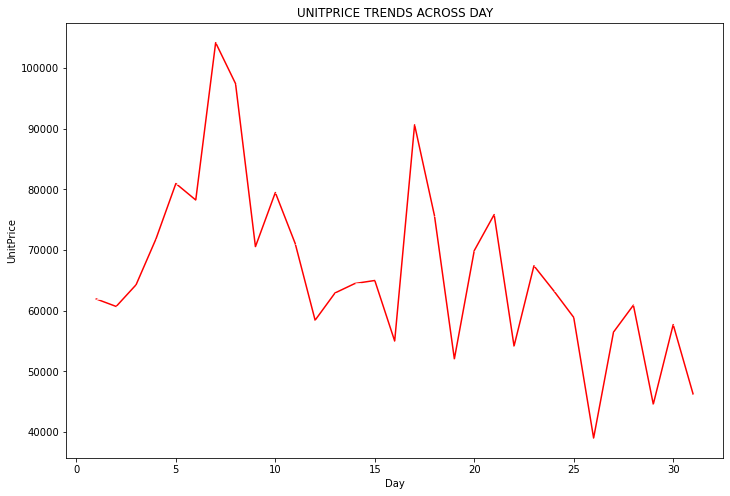

In [146]:
plt.figure(figsize=(40,8))
plt.subplot(1,3,2)
sns.lineplot(data=quan_per_day, x="Day", y="UnitPrice", marker = True, color = "red")
plt.title("UNITPRICE TRENDS ACROSS DAY")
